<a href="https://colab.research.google.com/github/user257814938/Hackathon_1/blob/main/projet/projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

Dans un contexte où la fidélisation des employés est essentielle, l’attrition représente un défi majeur pour les entreprises. Comprendre pourquoi certains employés quittent leur poste et quels facteurs influencent leur performance permet de mettre en place des stratégies RH efficaces.

À partir du jeu de données IBM HR Analytics – Employee Attrition & Performance, ce projet vise à identifier les variables clés (âge, poste, satisfaction, équilibre vie pro/perso, salaire, etc.) qui impactent le turnover et la performance des employés.

#**Problématique**

Quels sont les facteurs les plus déterminants de l’attrition et de la performance des employés, et comment l’entreprise peut-elle agir pour améliorer la rétention et la satisfaction du personnel ?

#**Import des librairies**

In [ ]:
import pandas as pd              # manipulation de données
import numpy as np               # outils numériques de base
import matplotlib.pyplot as plt  # graphiques de base
import seaborn as sns            # visualisations statistiques

#**Chargement du dataset depuis GitHub**

In [ ]:
url = "https://raw.githubusercontent.com/user257814938/Hackathon_1/refs/heads/main/Dataset/raw/IBM%20HR%20Analytics%20Employee%20Attrition%20%26%20Performance.csv"  # URL raw du CSV
df = pd.read_csv(url)                                                                                                                                                # charge le CSV dans un DataFrame

#**Aperçu avant nettoyage**

In [ ]:
df.columns                   # affiche la liste de toutes les colonnes du DataFrame avant nettoyage

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()                    # types de colonnes et valeurs non nulles avant nettoyage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head(5)                   # aperçu des 5 premières lignes avant nettoyage

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df.shape)              # dimensions (lignes, colonnes) avant nettoyage

(1470, 35)


#**Vérifier doublons & valeurs manquantes**

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)  # nombre de valeur manquante par colonne

In [ ]:
display(missing[missing > 0])                           # affiche uniquement les colonnes avec des valeur manquante

,0


In [ ]:
print(df.duplicated().sum())                            # nombre de lignes dupliquées

0


#**Pré-nettoyage**

In [ ]:
df.drop_duplicates(inplace=True)                                   # supprime les doublons exacts

In [ ]:
obj_cols = df.select_dtypes(include="object").columns.tolist()     # liste des colonnes texte
for c in obj_cols:                                                 # boucle sur colonnes texte
    df[c] = df[c].astype(str).str.strip()                          # enlève espaces en début et fin

In [ ]:
df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors="ignore")  # conversion des colonnes texte en numériques

/tmp/ipython-input-2465838021.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[obj_cols] = df[obj_cols].apply(pd.to_numeric, errors="ignore")  # conversion des colonnes texte en numériques


#**Aperçu après nettoyage**

In [ ]:
df.columns                   # affiche la liste de toutes les colonnes du DataFrame après nettoyage

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()                    # types de colonnes et valeurs non nulles après nettoyage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()                   # aperçu des lignes après nettoyage

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()                # donne les statistiques descriptives pour les colonnes numériques

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print(df.shape)              # dimensions (lignes, colonnes) après nettoyage

(1470, 35)


#**Sauvegarde du dataset sur Colab**

In [ ]:
df.to_csv("IBM HR Analytics Employee Attrition & Performance - processed.csv", index=False)   # export CSV nettoyé

#**Affiche la liste de tous les fichiers dans Colab**

In [ ]:
import os                                  # importe le module 'os' qui permet d’interagir avec le système de fichiers
print(os.listdir())                        # affiche la liste de tous les fichiers et dossiers présents dans le répertoire courant

#**Télécharger le dataset nettoyé**

In [ ]:
from google.colab import files                                                        # module pour les transferts locaux
files.download("IBM HR Analytics Employee Attrition & Performance - processed.csv")   # télécharge le fichier sur ton ordinateur

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Chargement du dataset clean depuis GitHub**

In [ ]:
clean_url = "https://raw.githubusercontent.com/user257814938/Hackathon_1/refs/heads/main/Dataset/processed/IBM%20HR%20Analytics%20Employee%20Attrition%20%26%20Performance%20-%20processed.csv"   # URL raw du CSV clean
df_clean = pd.read_csv(clean_url)                                                                                                                                                                 # charge la version clean depuis GitHub

#**Feature Engineering**

In [ ]:
# Création d'une variable binaire pour la cible

if "Attrition_Flag" not in df_clean.columns:                                               # vérifie si la colonne existe déjà
    df_clean["Attrition_Flag"] = (df_clean["Attrition"].str.upper() == "YES").astype(int)  # 1 = Yes, 0 = No

# Création de tranches d'âge

df_clean["AgeGroup"] = pd.cut(                                     # découpe les âges en catégories
    df_clean["Age"],                                               # colonne Age à découper
    bins=[17, 30, 40, 50, 60],                                     # intervalles de classes
    labels=["Jeune", "Milieu carrière", "Expérimenté", "Senior"]   # noms des groupes
)

# Ramener toutes les valeurs de revenu sur une échelle de 0 à 1 pour faciliter les comparaisons

min_income = df_clean["MonthlyIncome"].min()     # récupère la plus petite valeur de revenu mensuel
max_income = df_clean["MonthlyIncome"].max()     # récupère la plus grande valeur de revenu mensuel

df_clean["IncomeNorm"] = (df_clean["MonthlyIncome"] - min_income) / (max_income - min_income)   # applique la formule de normalisation min-max : (valeur - min) / (max - min) et crée une nouvelle colonne normalisée

# Encodage de la variable OverTime (Yes/No → 1/0)

if "OverTime" in df_clean.columns:
    df_clean["OverTime_Flag"] = df_clean["OverTime"].str.upper().map({"YES": 1, "NO": 0})  # conversion en binaire

# S'assurer que les colonnes ajoutées pendant le feature engineering existent bien dans le DataFrame

print("Nouvelles colonnes ajoutées :")                                                                            # affiche un titre pour plus de clarté
print([col for col in ["Attrition_Flag", "AgeGroup", "IncomeNorm", "OverTime_Flag"] if col in df_clean.columns])  # parcourt la liste des colonnes attendues et affiche uniquement celles qui existent dans df_clean

Nouvelles colonnes ajoutées :
['Attrition_Flag', 'AgeGroup', 'IncomeNorm', 'OverTime_Flag']


#**Analyse exploratoire des données (EDA)**

Répartition de la variable Attrition :
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


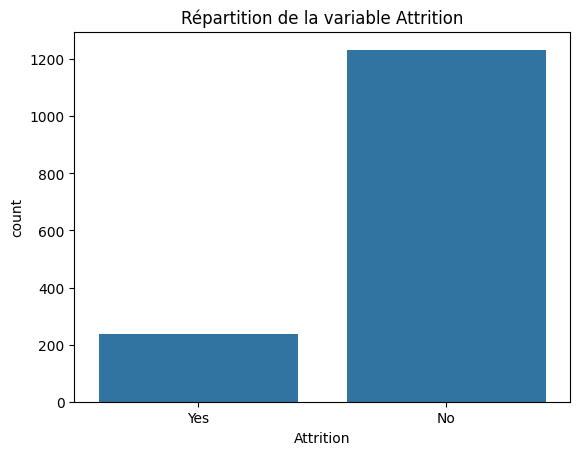

In [ ]:
# Répartition de la variable cible (Attrition)

print("Répartition de la variable Attrition :")
print(df_clean["Attrition"].value_counts())                    # compte le nombre de Yes/No
print(df_clean["Attrition"].value_counts(normalize=True)*100)  # affiche la répartition en pourcentage

sns.countplot(x="Attrition", data=df_clean)                    # graphique en barres pour visualiser la répartition
plt.title("Répartition de la variable Attrition")
plt.show()

**Observations :**

La majorité des employés n’ont pas quitté l’entreprise.
Environ 83 % sont restés (Attrition = No) contre 17 % partis (Attrition = Yes).

→ Le taux d’attrition global est donc relativement faible, mais significatif.

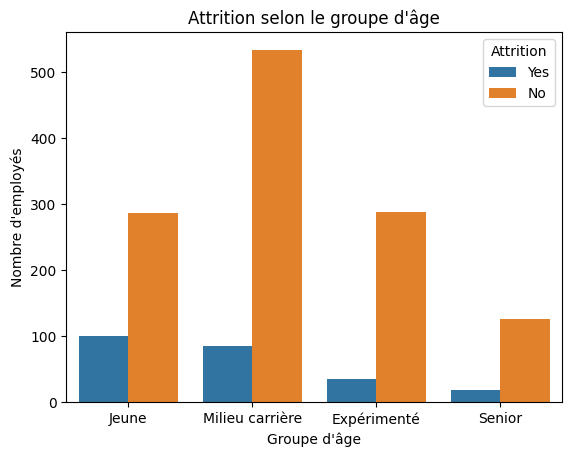

In [ ]:
# Attrition selon le groupe d'âge

sns.countplot(x="AgeGroup", hue="Attrition", data=df_clean)   # comparaison des départs par tranche d'âge
plt.title("Attrition selon le groupe d'âge")
plt.xlabel("Groupe d'âge")
plt.ylabel("Nombre d'employés")
plt.show()

**Observations :**

Les départs sont les plus nombreux dans les groupes “Jeune” et “Milieu carrière”.
Les employés “Expérimentés” et “Seniors” présentent un taux de rétention plus élevé.

→ L’expérience semble être un facteur de stabilité.

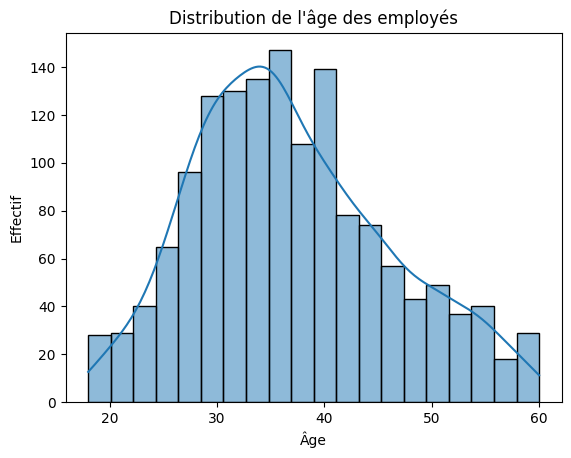

In [ ]:
# Distribution de l'âge des employés

sns.histplot(df_clean["Age"], bins=20, kde=True)               # histogramme avec courbe de densité
plt.title("Distribution de l'âge des employés")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.show()

**Observations :**

La répartition montre une forte concentration entre 30 et 40 ans.
Les employés plus jeunes (moins de 30 ans) sont minoritaires mais semblent plus sujets à l’attrition.

→ Les jeunes employés quittent plus souvent l’entreprise que les seniors.

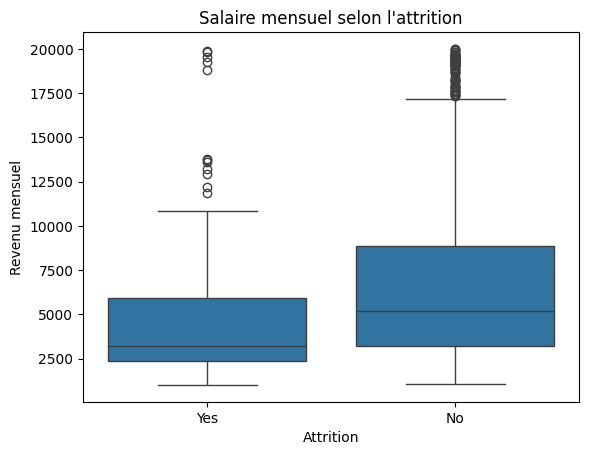

In [ ]:
# Salaire mensuel selon l'attrition

sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_clean)  # boxplot pour comparer les salaires
plt.title("Salaire mensuel selon l'attrition")
plt.xlabel("Attrition")
plt.ylabel("Revenu mensuel")
plt.show()

**Observations :**

Le revenu mensuel moyen des employés qui quittent l’entreprise est inférieur à celui des employés qui restent.

→ Un salaire plus faible est donc associé à un risque plus élevé d’attrition.

→ Le niveau de rémunération joue un rôle important dans la fidélisation.

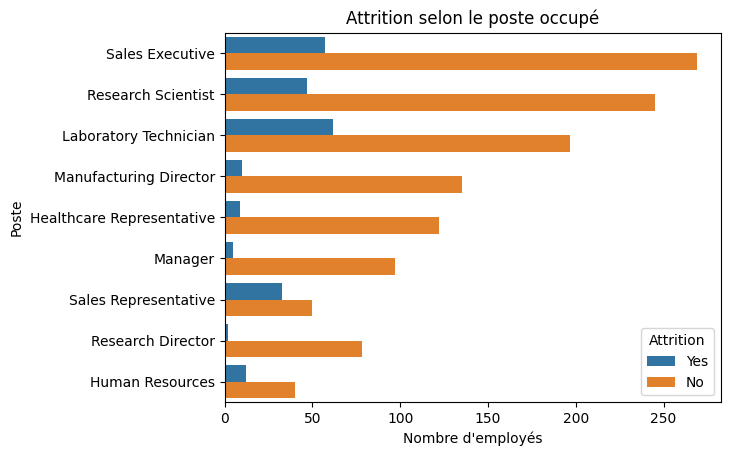

In [ ]:
# Attrition selon le poste occupé

sns.countplot(y="JobRole", hue="Attrition", data=df_clean)    # graphique horizontal
plt.title("Attrition selon le poste occupé")
plt.xlabel("Nombre d'employés")
plt.ylabel("Poste")
plt.show()

**Observations :**

Certains postes sont plus touchés que d’autres, notamment les Sales Representatives et Laboratory Technicians.
Les fonctions plus stables (ex. Managers, Research Directors) ont un taux d’attrition plus faible.

→ Le type de poste influence fortement le risque de départ.

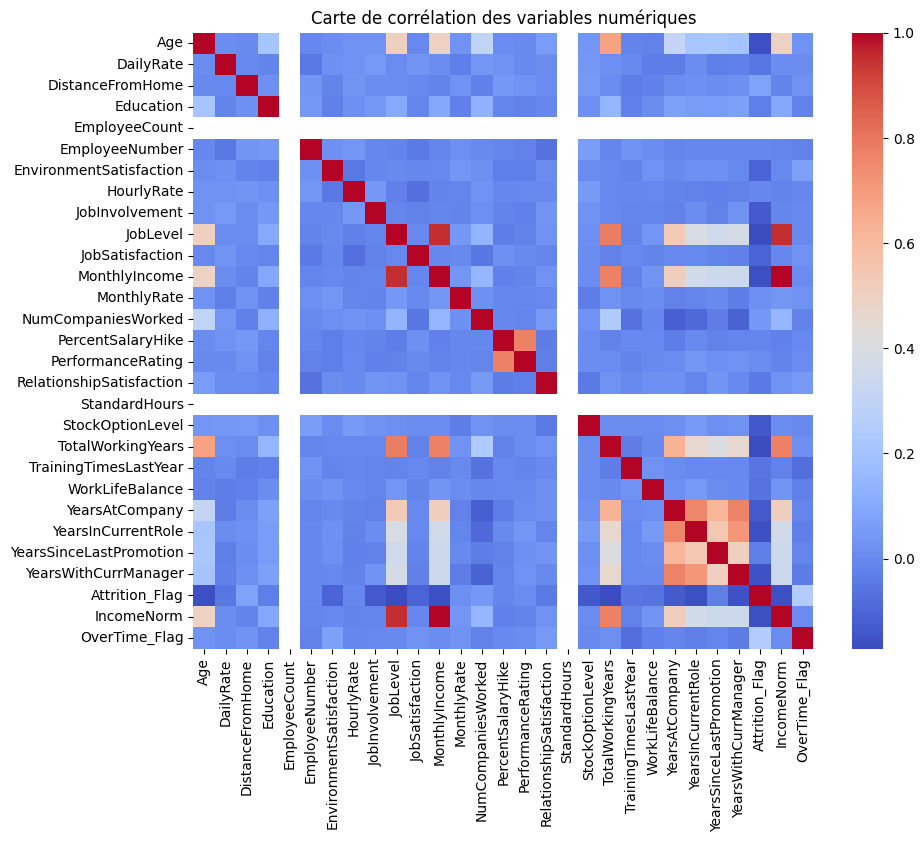

In [ ]:
# Carte de corrélation (variables numériques)
plt.figure(figsize=(10,8))                                     # taille du graphique
sns.heatmap(df_clean.corr(numeric_only=True), cmap="coolwarm") # matrice de corrélation
plt.title("Carte de corrélation des variables numériques")
plt.show()

**Observations :**

La carte montre une corrélation négative entre MonthlyIncome et Attrition_Flag
(plus le salaire est élevé, moins le risque de départ est grand).
On observe aussi une légère corrélation entre Age, JobLevel et YearsAtCompany.

→ Les employés plus âgés et mieux rémunérés ont tendance à rester plus longtemps.

#**Visualisations clés et corrélations**

In [ ]:
# Visualisation : Attrition selon la satisfaction au travail

sns.countplot(x="JobSatisfaction", hue="Attrition", data=df_clean)  # influence de la satisfaction sur le turnover
plt.title("Attrition selon la satisfaction au travail")
plt.xlabel("Satisfaction au travail (1 = faible, 4 = élevée)")
plt.ylabel("Nombre d'employés")
plt.show()

**Observations :**

Une faible satisfaction au travail est clairement associée à un taux d’attrition plus élevé.

**Description :**

L’insatisfaction vis-à-vis du poste, du management ou de l’environnement favorise le départ. Agir sur ce levier améliore directement la rétention.

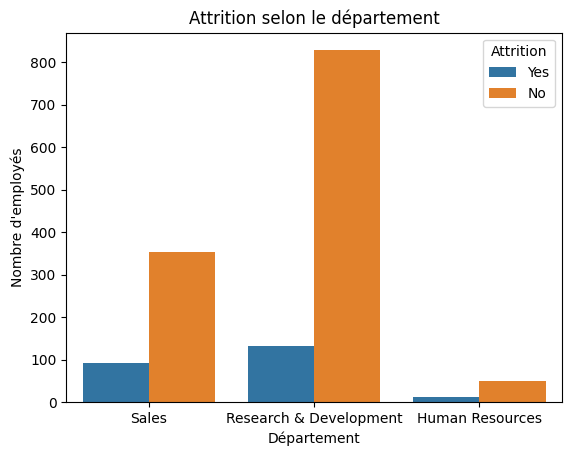

In [ ]:
# Visualisation : Attrition selon le département

sns.countplot(x="Department", hue="Attrition", data=df_clean)   # compare le taux d'attrition par département
plt.title("Attrition selon le département")
plt.xlabel("Département")
plt.ylabel("Nombre d'employés")
plt.show()

**Observations :**

Les départs sont plus fréquents dans certains départements, notamment Sales et Research & Development.

**Description :**

Ces départements subissent une pression et des objectifs élevés, ce qui peut expliquer un turnover plus important. Human Resources apparaît plus stable.

In [ ]:
# Visualisation : Distance domicile-travail selon l'attrition

sns.boxplot(x="Attrition", y="DistanceFromHome", data=df_clean)     # compare les distances selon le départ ou non
plt.title("Distance domicile-travail selon l'attrition")
plt.xlabel("Attrition (Yes / No)")
plt.ylabel("Distance depuis le domicile")
plt.show()

**Observations :**

Les employés habitant plus loin du lieu de travail présentent une légère tendance à quitter l’entreprise.

**Description :**

Des trajets longs génèrent fatigue et démotivation. Le télétravail ou une flexibilité horaire peuvent réduire cet effet.

In [ ]:
# Visualisation : Attrition selon l'équilibre vie pro / perso

sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df_clean)  # impact de l'équilibre vie pro/perso sur l'attrition
plt.title("Attrition selon l'équilibre vie professionnelle / personnelle")
plt.xlabel("Équilibre vie pro / perso (1 = faible, 4 = excellent)")
plt.ylabel("Nombre d'employés")
plt.show()

**Observations :**

Les employés ayant un faible équilibre vie pro/perso (notes 1 ou 2) quittent plus souvent l’entreprise.

**Description :**

Un mauvais équilibre accroît la fatigue et le stress, conduisant à davantage de départs. Les notes élevées (4) sont associées à une meilleure rétention.

In [ ]:
# Visualisation : Performance Rating selon l'attrition

sns.countplot(x="PerformanceRating", hue="Attrition", data=df_clean)  # compare les notes de performance selon le départ
plt.title("Attrition selon la note de performance")
plt.xlabel("Note de performance (1 = faible, 4 = excellente)")
plt.ylabel("Nombre d'employés")
plt.show()

**Observations :**

Les employés avec une note de performance faible ou moyenne (1 ou 2) quittent légèrement plus souvent l’entreprise.

**Description :**

Cela peut refléter un manque de reconnaissance ou une inadéquation poste/compétences. Un accompagnement ciblé peut limiter ces départs.

In [ ]:
# Matrice de corrélation numérique

plt.figure(figsize=(10,8))                                            # définit la taille de la figure
sns.heatmap(df_clean.corr(numeric_only=True), cmap="coolwarm")        # affiche les corrélations entre variables numériques
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()

**Observations :**

MonthlyIncome, Age et YearsAtCompany sont négativement corrélés avec l’attrition.

**Description :**

Un salaire plus élevé, un âge plus avancé et une plus grande ancienneté sont associés à une meilleure stabilité.

In [ ]:
# Corrélations avec la variable cible (Attrition_Flag)

corr_target = df_clean.corr(numeric_only=True)["Attrition_Flag"].sort_values(ascending=False)  # trie les corrélations avec la cible
print("Corrélations avec la variable Attrition_Flag :")
print(corr_target)

**Observations :**

OverTime_Flag corrèle positivement avec l’attrition, tandis que MonthlyIncome et Age corrèlent négativement.

**Description :**

La charge de travail (heures sup), la rémunération et l’expérience sont des déterminants majeurs du turnover et des leviers prioritaires d’action.

#**Insights et Storytelling**

###**Compréhension globale de l’attrition**  

**Observations :**

L’attrition touche principalement les employés jeunes, faiblement rémunérés et soumis à une charge de travail importante.

**Description :**

Les données montrent que l’âge, le revenu et les heures supplémentaires sont les principaux facteurs associés au départ. Ces variables traduisent à la fois un manque d’expérience, de satisfaction et d’équilibre vie professionnelle / personnelle.


---


###**Le rôle du salaire**  

**Observations :**

Les employés à faible salaire quittent plus souvent l’entreprise.

**Description :**

La rémunération est un facteur de rétention majeur. Un revenu insuffisant par rapport au poste, aux efforts ou aux responsabilités crée de la frustration et pousse les employés à chercher ailleurs. L’entreprise gagnerait à revoir sa politique salariale, surtout pour les postes de début de carrière.

---

###**L’impact de la charge de travail**  

**Observations :**

Les employés effectuant beaucoup d’heures supplémentaires présentent un taux d’attrition élevé.

**Description :**

Une charge de travail excessive, souvent non compensée, détériore la qualité de vie et la satisfaction. Introduire une meilleure gestion du temps et une reconnaissance des efforts permettrait de réduire ces départs.

---

###**La satisfaction au travail comme levier clé**  

**Observations :**

Les employés insatisfaits de leur poste quittent nettement plus souvent l’entreprise.

**Description :**

La satisfaction est un indicateur direct du bien-être et de l’engagement. Les leviers d’action peuvent inclure une meilleure communication interne, des opportunités de carrière, des formations ou une reconnaissance accrue.

---

###**Le facteur de l’expérience**  

**Observations :**

Les employés ayant plusieurs années d’ancienneté et un âge plus élevé restent plus fidèles à l’entreprise.

**Description :**

L’ancienneté et l’expérience créent un sentiment d’appartenance et de stabilité. Cela souligne l’importance d’accompagner les jeunes recrues et de renforcer leur sentiment d’intégration dans les premières années.

---

###**Les différences entre départements**  

**Observations :**

Le département Sales connaît plus de départs que les autres, suivi de Research & Development.

**Description :**

Ces secteurs, orientés performance et résultats, peuvent être soumis à davantage de pression et de stress. Des mesures ciblées de soutien managérial et de reconnaissance pourraient améliorer la rétention.

---

###**Vision d’ensemble**  

**Observations :**

L’attrition résulte d’un ensemble de facteurs liés à la rémunération, la charge de travail, la satisfaction et l’équilibre personnel.

**Description :**

L’entreprise doit adopter une approche globale :  
- Revaloriser les salaires des postes à haut risque.  
- Favoriser le bien-être au travail et l’équilibre vie pro/perso.  
- Renforcer la communication et la reconnaissance interne.  
- Offrir des perspectives d’évolution aux jeunes talents.  

Ces actions combinées permettraient de réduire le turnover et d’améliorer la performance globale des employés.

#**Conclusion et Recommandations finales**  

L’analyse menée sur l’attrition et la performance des employés met en évidence plusieurs facteurs déterminants du turnover : le niveau de rémunération, la charge de travail, la satisfaction au travail et l’équilibre entre vie professionnelle et personnelle.  
Ces éléments influencent directement la fidélité, l’engagement et la performance globale des employés.

Les employés jeunes, faiblement rémunérés et souvent soumis à des heures supplémentaires sont les plus exposés au risque de départ.  

À l’inverse, l’ancienneté, la satisfaction et un revenu stable favorisent la rétention et renforcent la cohésion au sein des équipes.

####**Recommandations principales :**

1. **Révision de la politique salariale**  
   Mettre en place une politique de rémunération plus équitable et transparente, adaptée aux responsabilités et aux performances.

2. **Amélioration de la qualité de vie au travail**  
   Encourager un meilleur équilibre entre vie professionnelle et personnelle par des mesures de flexibilité (télétravail, horaires aménagés, reconnaissance des heures supplémentaires).

3. **Renforcement de la satisfaction et de l’engagement**  
   Développer des programmes de formation, d’évolution de carrière et de reconnaissance afin de valoriser les efforts et les compétences.

4. **Soutien ciblé pour les départements à risque**  
   Mettre en place des actions spécifiques pour les équipes commerciales et techniques, davantage exposées au stress et à la pression.

5. **Mise en place d’un suivi régulier**  
   Créer un tableau de bord RH regroupant les indicateurs clés : taux d’attrition, satisfaction, performance et heures supplémentaires, afin de mesurer l’efficacité des actions menées.

####**Conclusion**

La compréhension fine des facteurs d’attrition permet de transformer un risque en opportunité d’amélioration organisationnelle.  

En agissant sur les leviers identifiés, rémunération, bien-être, reconnaissance et perspectives d’évolution, l’entreprise peut durablement **réduire le turnover**, **accroître la motivation** et **optimiser la performance collective**.